In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from matplotlib import pyplot as plt

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={'figure.figsize' : (10, 7) })

In [3]:
blobs2 = pd.read_csv('blobs2.csv')
blobs2.head()

,x,y,label
0,0.543066,3.931424,0
1,2.563694,3.473101,0
2,0.665973,2.781159,0
3,3.552344,1.538645,1
4,1.397117,0.668682,1


In [4]:
blobs2_X = blobs2.drop(columns=['label']).values
blobs2_y = blobs2.label.values

In [5]:
blobs2_X = PolynomialFeatures(degree=1).fit_transform(blobs2_X)

In [6]:
cancer = pd.read_csv('../HW6/cancer.csv')
spam = pd.read_csv('../HW6/spam.csv')

In [7]:
cancer_X = cancer.drop(columns=['label']).values
cancer_y = pd.factorize(cancer.label)[0]

In [8]:
spam_X = spam.drop(columns=['label']).values
spam_y = spam.label.values

# Применение SVM 

In [9]:
def visualize(X, y, model, data, kernel):
    h = .02  
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(PolynomialFeatures(degree=1).fit_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    p1 = sns.scatterplot(x='x', y='y', data=blobs2, hue='label', legend=False)
    plt.contour(xx, yy, Z, colors=['r', 'r'], linewidths=[0.5, 0.5])
    p2 = plt.scatter(model.support_vectors_[:, 1], model.support_vectors_[:, 2], c='green', marker='o', s=20)
    plt.legend([p2], ['Опорные векторы'])
    plt.title(f'Разделяющая плоскость (SVM с ядром {kernel})')

### linear kernel

In [10]:
b2_svm_linear = SVC(gamma='auto', kernel='linear').fit(blobs2_X, blobs2_y)

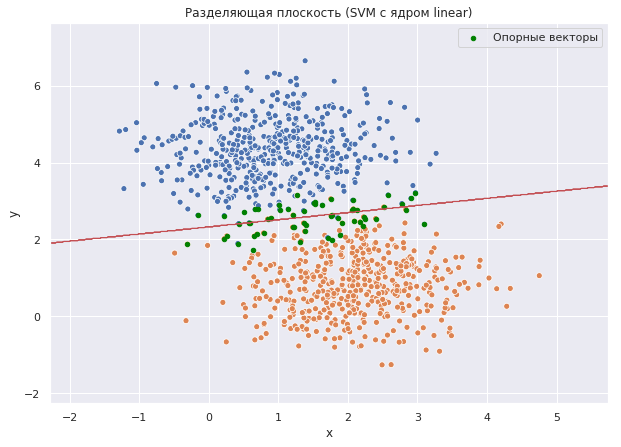

In [11]:
visualize(blobs2_X, blobs2_y, b2_svm_linear, blobs2, 'linear')

### polynomial kernels

In [12]:
b2_svm_poly2 = SVC(gamma='auto', kernel='poly', degree=2).fit(blobs2_X, blobs2_y)

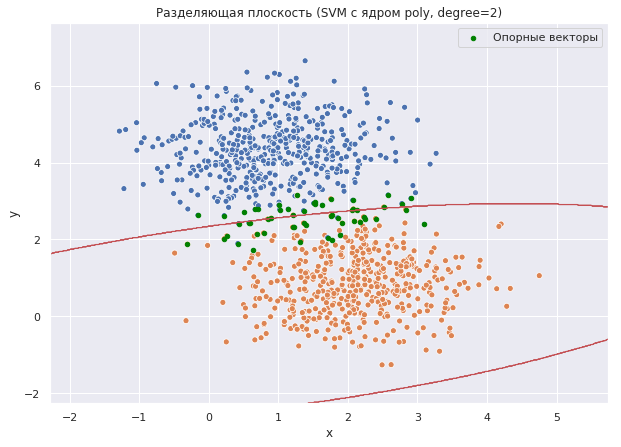

In [13]:
visualize(blobs2_X, blobs2_y, b2_svm_poly2, blobs2, 'poly, degree=2')

In [14]:
b2_svm_poly3 = SVC(gamma='auto', kernel='poly', degree=3).fit(blobs2_X, blobs2_y)

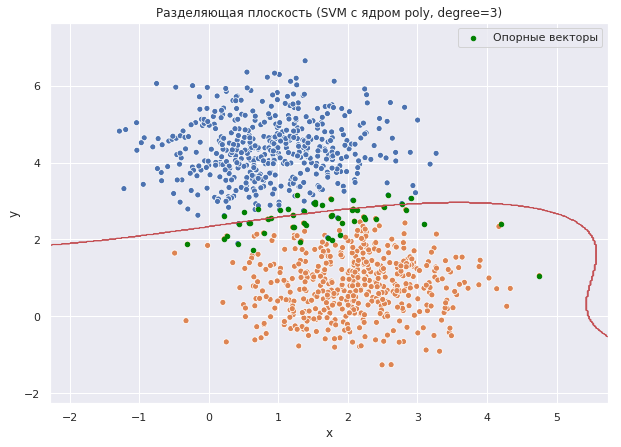

In [15]:
visualize(blobs2_X, blobs2_y, b2_svm_poly3, blobs2, 'poly, degree=3')

In [16]:
b2_svm_poly5 = SVC(gamma='auto', kernel='poly', degree=5).fit(blobs2_X, blobs2_y)

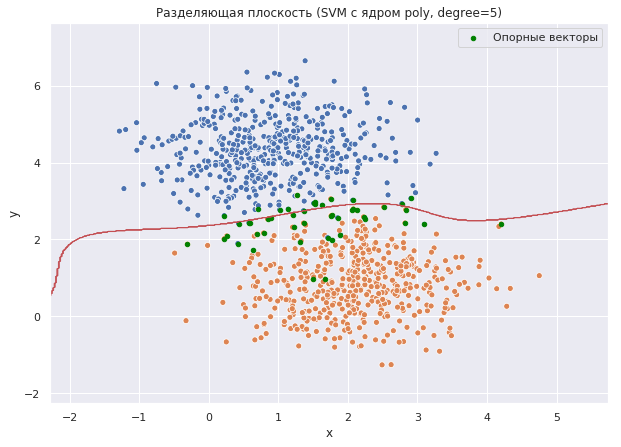

In [17]:
visualize(blobs2_X, blobs2_y, b2_svm_poly5, blobs2, 'poly, degree=5')

### RBF kernel

In [18]:
b2_svm_rbf = SVC(gamma='auto', kernel='rbf').fit(blobs2_X, blobs2_y)

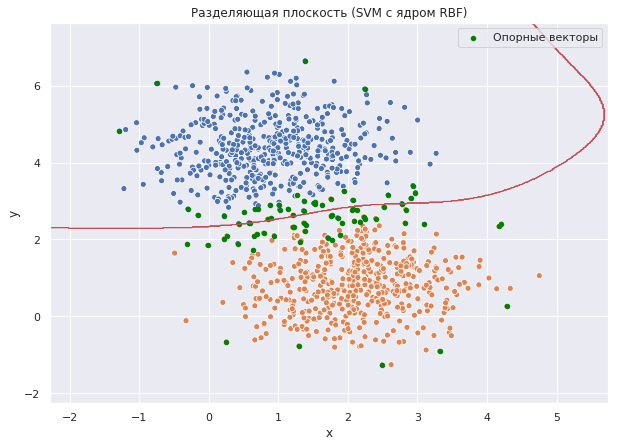

In [19]:
visualize(blobs2_X, blobs2_y, b2_svm_rbf, blobs2, 'RBF')

# Сравнение SVM и RandomForest по времени работы

In [20]:
def eval_model(model, x_train, x_test, y_train, y_test, model_name, dataset_name):
    y_train, y_test = y_train.reshape((-1, 1)), y_test.reshape((-1, 1))
    start_time = time.time()
    model = model.fit(x_train, y_train)
    end_time = time.time()
    
    acc_score = accuracy_score(y_test, np.ravel(model.predict(x_test)))
    print(f'Model: {model_name}\n'
          f'Dataset: {dataset_name}\n'
          f'Fitting time: {end_time - start_time} sec\n'
          f'Accuracy: {acc_score}')

In [26]:
eval_model(SVC(gamma='auto', kernel='linear'),
           *train_test_split(cancer_X, cancer_y, test_size=0.3, shuffle=True,
                            stratify=cancer_y, random_state=6),
           'SVC with linear kernel', 'cancer')

print()

eval_model(RandomForestClassifier(max_depth=4),
           *train_test_split(cancer_X, cancer_y, test_size=0.3, shuffle=True,
                            stratify=cancer_y, random_state=6),
           'RandomForestClassifier with max_depth=4', 'cancer')

Model: SVC with linear kernel
Dataset: cancer
Fitting time: 1.101388931274414 sec
Accuracy: 0.9707602339181286

Model: RandomForestClassifier with max_depth=4
Dataset: cancer
Fitting time: 0.011012792587280273 sec
Accuracy: 0.9824561403508771


In [28]:
eval_model(SVC(gamma='auto', kernel='linear'),
           *train_test_split(spam_X, spam_y, test_size=0.3, shuffle=True,
                            stratify=spam_y, random_state=6),
           'SVC with linear kernel', 'spam')

Model: SVC with linear kernel
Dataset: spam
Fitting time: 331.1131103038788 sec
Accuracy: 0.9290369297610427


In [29]:
eval_model(RandomForestClassifier(max_depth=5),
           *train_test_split(spam_X, spam_y, test_size=0.3, shuffle=True,
                            stratify=spam_y, random_state=6),
           'RandomForestClassifier with max_depth=5', 'spam')

Model: RandomForestClassifier with max_depth=5
Dataset: spam
Fitting time: 0.05329298973083496 sec
Accuracy: 0.9210716871832005
